# An Analysis of Movie Performance, Part 2: Data Analysis and Presentation

In this part, you’ll use the datasets you gathered in Part 1 to explore what makes a movie successful. You’ll perform exploratory data analysis, create visualizations, and, where appropriate, fit simple statistical models.

The main goal is to discover patterns and communicate them clearly, not just to crunch numbers.

**Learning Objectives**  
By the end of this part, you should be able to:  
* Combine and clean multiple real-world datasets from different sources.  
* Conduct exploratory data analysis (EDA) with pandas and visualization libraries.  
* Apply basic statistical modeling to test hypotheses.  
* Communicate insights effectively to a non-technical audience.

In [48]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from IPython.core.display import HTML
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

1. **Exploratory Analysis**  
Begin by understanding your dataset as a whole. Look for trends, outliers, and relationships.  

    Examples of questions to explore:  
    * How popular is each genre over the last decade?
    * How do budget and revenue vary by year or by genre?  
    * What is the average profit margin (revenue - budget) across genres or years?  
    * How do movie ratings (vote average) relate to box-office performance?  
    * Adjust all financial metrics (budget and revenue) for inflation to 2024 dollars using CPI data.

    Deliverables:  
    * At least 3-4 clearly labeled visualizations (bar charts, scatter plots, or boxplots).  

In [2]:
movie_dataset= pd.read_csv('../data/movies_2015_2024.csv')
movie_dataset.head(3)

,Unnamed: 0,Year,Data,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,budget,revenue
0,0,2015,"{'adult': False, 'backdrop_path': '/kIBK5SKwgq...",False,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,11.8411,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,2015-04-22,Avengers: Age of Ultron,False,7.271,23847,"['Action', 'Adventure', 'Science Fiction']",365000000,1405403694
1,1,2015,"{'adult': False, 'backdrop_path': '/gqrnQA6Xpp...",False,/gqrnQA6Xppdl8vIb2eJc58VC1tW.jpg,"[28, 12, 878]",76341,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,10.6392,/hA2ple9q4qnwxp3hKVNhroipsir.jpg,2015-05-13,Mad Max: Fury Road,False,7.627,23503,"['Action', 'Adventure', 'Science Fiction']",150000000,378858340
2,2,2015,"{'adult': False, 'backdrop_path': '/jJKZaTBNen...",False,/jJKZaTBNenlFclQyjrnvzkRmvWE.jpg,"[16, 10751, 12, 18, 35]",150540,en,Inside Out,"When 11-year-old Riley moves to a new city, he...",13.9604,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,2015-06-17,Inside Out,False,7.910,22917,"['Animation', 'Family', 'Adventure', 'Drama', ...",175000000,857611174


In [3]:
##Clean up the dataframe to only have the columns with relevant data 
movie_dataset.columns
movie_dataset= movie_dataset[['Year', 'adult', 'original_language', 'original_title', 'popularity', 'vote_average', 'vote_count', 'genres', 'budget', 'revenue']]
movie_dataset.head(3)

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,"['Action', 'Adventure', 'Science Fiction']",365000000,1405403694
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,"['Action', 'Adventure', 'Science Fiction']",150000000,378858340
2,2015,False,en,Inside Out,13.9604,7.910,22917,"['Animation', 'Family', 'Adventure', 'Drama', ...",175000000,857611174


In [4]:
#clean up genre column -> strip the square paranthesize and organize the groups 
#movie_dataset['genres'][0].replace('[', '').replace(']', '').replace("'", '').split(',')
#update the column with the new cleaner text 
#movie_dataset['genres'][0].replace('[', '').replace(']', '').replace("'", '').split(',')
clean_genre_info= []
count_genre_group= []
for row in movie_dataset['genres']:
    clean_genre= row.replace('[', '').replace(']', '').replace("'", '').split(',')
    clean_genre_info.append(clean_genre)
    count_genre_group.append(len(clean_genre))

movie_dataset['genres']= clean_genre_info
movie_dataset['n_genres']= count_genre_group
movie_dataset.head(3)

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,"[Action, Adventure, Science Fiction]",365000000,1405403694,3
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,"[Action, Adventure, Science Fiction]",150000000,378858340,3
2,2015,False,en,Inside Out,13.9604,7.910,22917,"[Animation, Family, Adventure, Drama, Comedy]",175000000,857611174,5


Text(0.5, 0, 'number genres for each movie')

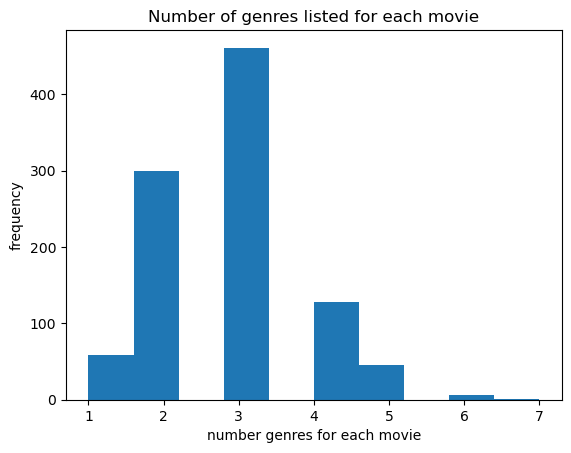

In [5]:
#visualize the number of genres for each movie, distribution 
fig, ax= plt.subplots()
ax.hist(movie_dataset['n_genres']);
ax.set_title('Number of genres listed for each movie')
ax.set_ylabel('frequency')
ax.set_xlabel('number genres for each movie')

In [19]:
#explode the dataframe so each row only has one genre, but all genre info is kept for each movie
movie_genre_clean= movie_dataset.explode('genres')
movie_genre_clean.head(10)

#clean up genre test so it organizes correctly
movie_genre_clean['genres']= movie_genre_clean['genres'].str.lstrip().str.rstrip().str.lower()

### How popular is each genre over the last decade?

In [7]:
#popular by number of movies? Or popular by vote count? or populat by 'popularity' metric?

In [20]:
movie_genre_clean.groupby(['genres', 'Year'])['popularity'].mean()

genres   Year
action   2015    8.023700
         2016    6.176611
         2017    6.736766
         2018    9.575884
         2019    6.864686
                   ...   
western  2016    6.431050
         2017    5.072700
         2018    4.518700
         2020    5.782200
         2021    5.118500
Name: popularity, Length: 168, dtype: float64

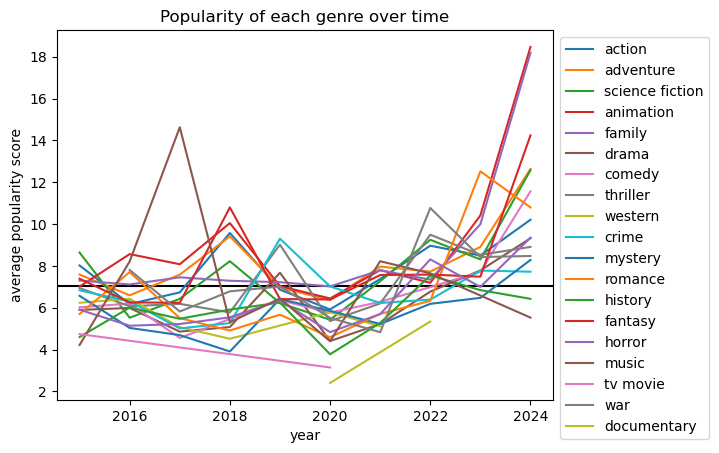

In [47]:
#graph- each genre is a line graph over year, and you can visualize it by progression 

#create a list of genres
genre_list= movie_genre_clean['genres'].unique().tolist()
genre_list

#determine the average popuarity across all movies 
avg_pop= movie_dataset['popularity'].mean().round(2)
avg_pop

fig, ax= plt.subplots()
ax.axhline(y=avg_pop, color='k') #create a vertlical line that is the average poularity score for ALL movies
ax.set_ylabel('average popularity score')
ax.set_xlabel('year')
ax.set_title('Popularity of each genre over time')
#create a for loop for graphing- groupby each genre and create a linegraph
for genre in genre_list:
    #create a filtered dataframe for each genre
    genre_pop_time= movie_genre_clean[movie_genre_clean['genres'] == genre]

    #get the data for the graph by groupby year, and calculating mean and sem
    plot_summary= genre_pop_time.groupby('Year')['popularity'].agg(['mean', 'sem'])

    #make a line graph 
    ax.plot(plot_summary.index, plot_summary['mean'], label= genre)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [67]:
genre_year= movie_genre_clean.groupby(['Year', 'genres'])['popularity'].mean()
year_index= genre_year.index.get_level_values('Year')
genre_index= genre_year.index.get_level_values('genres')
genre_year

Year  genres         
2015  action              8.023700
      adventure           7.587822
      animation           7.012943
      comedy              6.023040
      crime               6.833654
                           ...    
2024  mystery             8.286720
      romance            10.796537
      science fiction    12.580771
      thriller            8.910000
      war                 8.476600
Name: popularity, Length: 168, dtype: float64

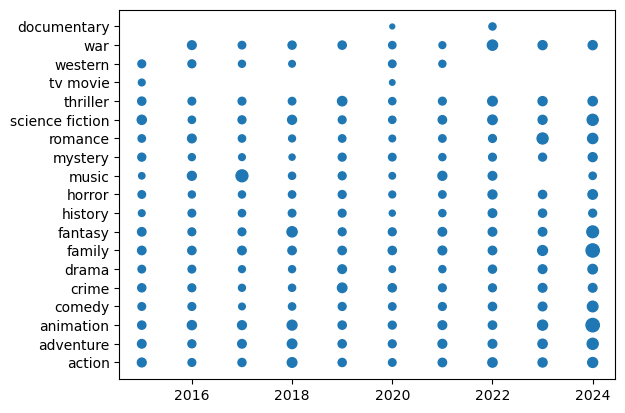

In [69]:
movie_genre_clean.head(3)

plt.scatter(year_index, genre_index, sizes= genre_year*5)

-----

exploratory questions: How does budget impact popularity?

In [70]:
movie_dataset

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,"[Action, Adventure, Science Fiction]",365000000,1405403694,3
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,"[Action, Adventure, Science Fiction]",150000000,378858340,3
2,2015,False,en,Inside Out,13.9604,7.910,22917,"[Animation, Family, Adventure, Drama, Comedy]",175000000,857611174,5
3,2015,False,en,Jurassic World,11.8662,6.700,21094,"[Action, Adventure, Science Fiction, Thriller]",150000000,1671537444,4
4,2015,False,en,The Martian,9.0021,7.690,20579,"[Drama, Adventure, Science Fiction]",108000000,631058917,3
...,...,...,...,...,...,...,...,...,...,...,...
995,2024,False,en,Miller's Girl,3.8256,6.348,880,"[Thriller, Drama, Romance]",4000000,1430985,3
996,2024,False,pt,Ainda Estou Aqui,4.4395,7.951,861,"[Drama, History]",1480000,36109482,2
997,2024,False,en,Love Lies Bleeding,8.0038,6.572,856,"[Crime, Romance, Thriller, Drama]",10000000,12778225,4
998,2024,False,en,Arthur the King,3.2761,7.577,855,"[Adventure, Drama]",19000000,40829138,2


-----

2. **Performance Comparisons**  
    Use your merged dataset to examine whether recognition and awards are associated with better performance.  
    Investigate:  
    * Do Best Picture nominees or winners tend to earn higher box-office revenue than non-nominated movies?  
    * Are certain genres or types of roles more common among award-winning films?
    * (If you did the optional scrape) Do movies featuring a Best Actor or Best Actress winner in their cast tend to perform better?  
  
    Deliverables:  
    * At least one regression model 

3. **Presentation**  
    Prepare a 10-12 minute presentation of your findings.  
    Your presentation should:  
    * Focus on findings and insights, not code.  
    * Tell a clear story: the questions you asked and what you found.  
    * Include visuals such as charts, summary tables, or model results.
    * Avoid screenshots of code or raw output. Think of your audience as studio executives or film analysts, not programmers.

    Your presentation should be done using PowerPoint/Google Slides or other presentation software.